# pandas 20本ノック

## 下準備

In [1]:

# driveのマウント
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# 読み込み用の仮data
dir_path = "/content/drive/MyDrive/DataSience/titanic/"

In [3]:
# import
import pandas as pd

## 問題20問

In [4]:
# 1 データの読み込み
df = pd.read_csv(dir_path+"train.csv")
print(len(df))

891


In [5]:
# 2 データの中身確認

# 先頭3行
df.head(3) #headは先頭から指定した行数を表示

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# 末尾10行
df.tail(10) #tailは末尾から指定した行数を表示

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
# 3 不要な列、行の削除
df2 = df.copy()

# カラムの削除
df2 = df2.drop(columns=["Pclass"])
df2.head(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [8]:
# 行の削除
df3 = df.copy()
df3 = df3.drop(0) #indexを指定して削除 複数は配列で指定
df3.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [9]:
# 4 データの型、サイズ、列名、行名の確認
print("データ型",df.dtypes) # dtypes

print("サイズ",df.shape) # DataFrameのサイズ

print("列名",df.columns) # columns

print("行名",df.index) # indexs

データ型 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
サイズ (891, 12)
列名 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
行名 RangeIndex(start=0, stop=891, step=1)


In [10]:
# 5 任意の要素の取得

#dfの5～10行目 列名Age	SibSp	Parch
df4 = df[["Age","SibSp","Parch"]][5:11]

df4

,Age,SibSp,Parch
5,NaN,0,0
6,54.0,0,0
7,2.0,3,1
8,27.0,0,2
9,14.0,1,0
10,4.0,1,1


In [11]:
# 別回答
#dfの5～10行目 列名Age	SibSp	Parch
df5 = df.iloc[5:11,5:8] # iloc [行番号指定(0スタート),列番号指定]
# loc [行番号指定(index番号),カラム名で記載]

df5

,Age,SibSp,Parch
5,NaN,0,0
6,54.0,0,0
7,2.0,3,1
8,27.0,0,2
9,14.0,1,0
10,4.0,1,1


In [12]:
# 6 条件抽出
df6 = df[(df["Survived"] == 1) & (df["Age"] > 30)][0:3] # 複数件の書き方 かっこを使用する
df6

# queryの書き方
# df.query("カラム名 == 'aaa'")
# df.query("20 <=カラム名 & カラム名 < 30")

# isinの書き方
# df[df["カラム名"].isin(["項目名"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [13]:
# 7 ユニークな値の抽出
df7 = df["Embarked"].unique()
df7

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
# 8 重複除去
df8 = df.drop_duplicates(subset = "Embarked") # 重複の除去 引数で除去したいカラムを指定 カラムなしは全体で除去する
df8

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN


In [15]:
# 9 カラム名変更
df9 = df.rename(columns={"Survived":"test"})
# .columnsで代入する

df9.head()

,PassengerId,test,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# 10 並び替え
df10 = df.sort_values("Age",ascending=False) # sort_values 
# 引数でカラムのみは昇順
# ascending=falseで降順

df10

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
# 11 ダミー変数
# ダミー変数→カテゴリ変数を数値化する
df11 = df.copy()

#pd.get_dummies(df11["Sex"])
# get_dummies(dataFrame,columns=[カラム名])で可能
pd.get_dummies(df11,columns=["Sex"])


In [ ]:
# 12 欠損値の確認
df12 =df.copy()

# 欠損→true
# あり→false
df12.isnull()

In [24]:
# 13 欠損値の補完

# fillna("欠損値を置き換える値")
df12 = df12["Age"].fillna(0)
df12.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     0.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [25]:
# 14 欠損値の削除
df14 = df.copy()

# 行の場合はaxis=0

# 列で消す
df14 = df14.dropna(axis=1)
df14

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [29]:
# 15 ユニークな値と出現回数
df15 = df.copy()

df15["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
# 16 グループごとの集計
df16 = df.copy()

# groupby(カラム名)でグループごとにまとめることができる
df16.groupby("Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [32]:
# 17 統計量の確認
df17 = df.copy()
df17.describe()

# mean() 平均値
# median() 中央値
# std() 標準偏差
# max() 最大値
# min() 最小値

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


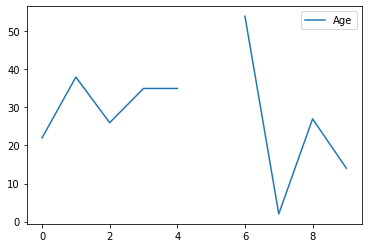

In [35]:
# 18 折れ線グラフ
import matplotlib.pyplot as plt

df18 = df.copy()


#x 縦軸名
#y 横軸名
# legend 凡例

df18["Age"][:10].plot()


In [37]:
# 19 相関係数
df19 = df.copy()
df19[["Survived","Age"]].corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


In [38]:
# 20 ファイルの出力
df20 = df.copy()
df20.to_csv("export_test.csv")
